### Descriptive Statistics ###

In [1]:
## Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2  ## PostgreSQL Connection Package

#### PostgreSQL Connection Details ####

In [2]:
# Connection to PostgreSQL Database
connection = psycopg2.connect(user='capstonedba', password='ubaEYyxl3UimQCGa4S1e8yvlZmkGRK', host='capstone-db.c9mqkx12zppw.us-east-1.rds.amazonaws.com', port='5432', database='capstonedba')

cursor = connection.cursor()

## Printing database connection properties
print(connection.get_dsn_parameters(),'\n')

## Printing PostgreSQL Database version
cursor.execute("SELECT version();")
record = cursor.fetchone()
print("You are connected to - ", record, '\n')

{'user': 'capstonedba', 'dbname': 'capstonedba', 'host': 'capstone-db.c9mqkx12zppw.us-east-1.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 10.6 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 



In [3]:
# Pulling data from database for dataframe
## Creating variable for SQL query
sql = "SELECT * FROM loans WHERE year='2016';"

### Executing sql query on database
cursor.execute(sql)

#### Fetching the results from query
data = cursor.fetchall()

##### Storing them in a variable and then making that variable a DataFrame
data = pd.DataFrame(data)
print(data.head())

     0        1        2       3       4     5     6   7   8   9   \
0  2016  2004452  Atlanta  1.5112  383368  0.84  2015   2   2   1   
1  2016  2004453  Atlanta  0.7347  112822  0.76  2015   2   2   1   
2  2016  2004454  Atlanta  0.8536  125345     1  2015   1   2   1   
3  2016  2004455  Atlanta  1.4262  162084  1.03  2015   1   2   1   
4  2016  2004456  Atlanta  2.0272  396490  0.89  2015   1   2   1   

      ...         15    16    17 18     19 20     21    22 23           24  
0     ...       PT07  0.13  1.61  1  0.879  1  2.345  1.76  1  0.759300382  
1     ...       PT01  0.13  1.61  1  0.879  1  2.345  1.76  1  0.759300382  
2     ...       PT01  0.13     1  1  0.879  1  2.345  1.76  1  0.471615144  
3     ...       PT01  0.13     1  1  0.879  1  2.345  1.76  1  0.471615144  
4     ...       PT07  0.13     1  1  0.879  1  2.345  1.76  1  0.471615144  

[5 rows x 25 columns]


In [4]:
# Manually Coding Columns for DataFrame
data.columns = ['Year', 'Assigned_ID', 'Bank', 'IncRat', 'UPB', 'LTV', 'MortDate','Purpose', 'Coop', 'Product','FedGuar', 'Occup', 'Front','Back','BoCreditScor','PropType', 'LTV_M', 'Purpose_M','Coop_M','Product_M','Occup_M','Back_M','BoCreditScor_M','PropType_M','Loan_Multiplier']
print(data.head())

   Year  Assigned_ID     Bank  IncRat     UPB   LTV  MortDate  Purpose  Coop  \
0  2016      2004452  Atlanta  1.5112  383368  0.84      2015        2     2   
1  2016      2004453  Atlanta  0.7347  112822  0.76      2015        2     2   
2  2016      2004454  Atlanta  0.8536  125345     1      2015        1     2   
3  2016      2004455  Atlanta  1.4262  162084  1.03      2015        1     2   
4  2016      2004456  Atlanta  2.0272  396490  0.89      2015        1     2   

   Product       ...        PropType  LTV_M Purpose_M Coop_M Product_M  \
0        1       ...            PT07   0.13      1.61      1     0.879   
1        1       ...            PT01   0.13      1.61      1     0.879   
2        1       ...            PT01   0.13         1      1     0.879   
3        1       ...            PT01   0.13         1      1     0.879   
4        1       ...            PT07   0.13         1      1     0.879   

  Occup_M Back_M BoCreditScor_M PropType_M Loan_Multiplier  
0       1  2.

In [5]:
# Checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60989 entries, 0 to 60988
Data columns (total 25 columns):
Year               60989 non-null int64
Assigned_ID        60989 non-null int64
Bank               60989 non-null object
IncRat             60989 non-null object
UPB                60989 non-null object
LTV                60989 non-null object
MortDate           60989 non-null int64
Purpose            60989 non-null int64
Coop               60989 non-null int64
Product            60989 non-null int64
FedGuar            60989 non-null int64
Occup              60989 non-null int64
Front              60989 non-null object
Back               60989 non-null object
BoCreditScor       60989 non-null object
PropType           60989 non-null object
LTV_M              60989 non-null object
Purpose_M          60989 non-null object
Coop_M             60989 non-null object
Product_M          60989 non-null object
Occup_M            60989 non-null object
Back_M             60989 non-null obje

In [6]:
# Recoding variables to the right data type
data.IncRat = data.IncRat.astype(float)
data.UPB = data.UPB.astype(int)
data.LTV = data.LTV.astype(float)
data.Front = data.Front.astype(float)
data.Back = data.Back.astype(float)
data.LTV_M = data.LTV_M.astype(float)
data.Purpose_M = data.Purpose_M.astype(float)
data.Coop_M = data.Coop_M.astype(float)
data.Product_M = data.Product_M.astype(float)
data.Occup_M = data.Occup_M.astype(float)
data.Back_M = data.Back_M.astype(float)
data.BoCreditScor_M = data.BoCreditScor_M.astype(float)
data.PropType_M = data.PropType_M.astype(float)
data.Loan_Multiplier = data.Loan_Multiplier.astype(float)

In [7]:
# Checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60989 entries, 0 to 60988
Data columns (total 25 columns):
Year               60989 non-null int64
Assigned_ID        60989 non-null int64
Bank               60989 non-null object
IncRat             60989 non-null float64
UPB                60989 non-null int32
LTV                60989 non-null float64
MortDate           60989 non-null int64
Purpose            60989 non-null int64
Coop               60989 non-null int64
Product            60989 non-null int64
FedGuar            60989 non-null int64
Occup              60989 non-null int64
Front              60989 non-null float64
Back               60989 non-null float64
BoCreditScor       60989 non-null object
PropType           60989 non-null object
LTV_M              60989 non-null float64
Purpose_M          60989 non-null float64
Coop_M             60989 non-null float64
Product_M          60989 non-null float64
Occup_M            60989 non-null float64
Back_M             60989 non-n

In [8]:
# Describing the data
data.describe()

,Year,Assigned_ID,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,FedGuar,...,Back,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
count,60989.0,6.098900e+04,60989.000000,60989.000000,60989.000000,60989.000000,60989.000000,60989.0,60989.0,60989.000000,...,60989.000000,60989.000000,60989.000000,60989.0,6.098900e+04,60989.000000,6.098900e+04,60989.000000,60989.000000,60989.000000
mean,2016.0,2.033385e+06,1.650246,211973.001886,0.746919,2015.947023,1.559183,2.0,1.0,0.146666,...,0.290169,0.129744,1.338671,1.0,8.790000e-01,1.005951,2.345000e+00,1.313974,1.009082,0.469915
std,0.0,1.846637e+04,2.031755,120582.737916,0.156082,0.233522,0.504450,0.0,0.0,0.561976,...,0.088374,0.000838,0.303138,0.0,6.779077e-13,0.042117,9.978766e-13,0.915258,0.053455,0.331055
min,2016.0,2.002345e+06,0.015900,11500.000000,0.010000,2013.000000,1.000000,2.0,1.0,0.000000,...,0.004200,0.127000,1.000000,1.0,8.790000e-01,1.000000,2.345000e+00,0.743000,1.000000,0.194502
25%,2016.0,2.017593e+06,0.938600,120914.000000,0.670000,2016.000000,1.000000,2.0,1.0,0.000000,...,0.222800,0.130000,1.000000,1.0,8.790000e-01,1.000000,2.345000e+00,0.743000,1.000000,0.259622
50%,2016.0,2.032841e+06,1.380200,184000.000000,0.800000,2016.000000,2.000000,2.0,1.0,0.000000,...,0.290000,0.130000,1.610000,1.0,8.790000e-01,1.000000,2.345000e+00,0.743000,1.000000,0.320546
75%,2016.0,2.048088e+06,1.965700,276000.000000,0.800000,2016.000000,2.000000,2.0,1.0,0.000000,...,0.360000,0.130000,1.610000,1.0,8.790000e-01,1.000000,2.345000e+00,1.760000,1.000000,0.759300
max,2016.0,2.067614e+06,176.626300,787838.000000,1.390000,2016.000000,4.000000,2.0,1.0,3.000000,...,0.988800,0.130000,1.610000,1.0,8.790000e-01,1.304000,2.345000e+00,7.426000,1.930000,4.005008


(array([6.0946e+04, 2.9000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]), array([1.5900000e-02, 1.7676940e+01, 3.5337980e+01, 5.2999020e+01,
       7.0660060e+01, 8.8321100e+01, 1.0598214e+02, 1.2364318e+02,
       1.4130422e+02, 1.5896526e+02, 1.7662630e+02]), <a list of 10 Patch objects>)


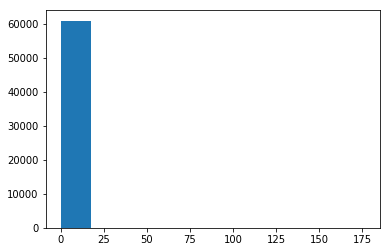

In [16]:
print(plt.hist(data.IncRat))

(array([7.2890e+03, 1.9418e+04, 1.4669e+04, 8.9210e+03, 4.9280e+03,
       3.5510e+03, 1.1560e+03, 1.0430e+03, 8.0000e+00, 6.0000e+00]), array([ 11500. ,  89133.8, 166767.6, 244401.4, 322035.2, 399669. ,
       477302.8, 554936.6, 632570.4, 710204.2, 787838. ]), <a list of 10 Patch objects>)


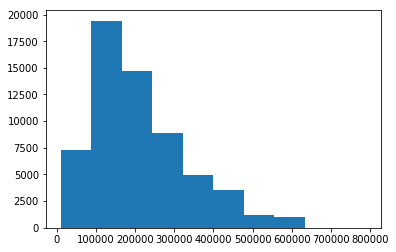

In [17]:
print(plt.hist(data.UPB))

(array([4.2000e+01, 6.2600e+02, 2.1100e+03, 4.9600e+03, 9.6650e+03,
       3.0411e+04, 1.0286e+04, 2.8810e+03, 7.0000e+00, 1.0000e+00]), array([0.01 , 0.148, 0.286, 0.424, 0.562, 0.7  , 0.838, 0.976, 1.114,
       1.252, 1.39 ]), <a list of 10 Patch objects>)


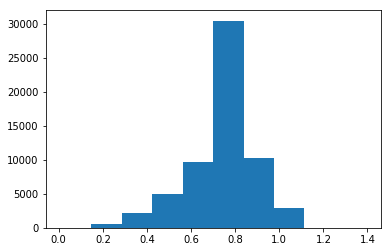

In [18]:
print(plt.hist(data.LTV))

(array([3.4000e+01, 0.0000e+00, 0.0000e+00, 3.1000e+01, 0.0000e+00,
       0.0000e+00, 3.0670e+03, 0.0000e+00, 0.0000e+00, 5.7857e+04]), array([2013. , 2013.3, 2013.6, 2013.9, 2014.2, 2014.5, 2014.8, 2015.1,
       2015.4, 2015.7, 2016. ]), <a list of 10 Patch objects>)


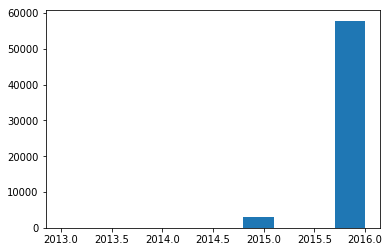

In [19]:
print(plt.hist(data.MortDate))

(array([27047.,     0.,     0., 33861.,     0.,     0.,     0.,     0.,
           0.,    81.]), array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), <a list of 10 Patch objects>)


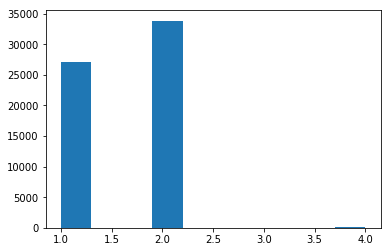

In [20]:
print(plt.hist(data.Purpose))

(array([    0.,     0.,     0.,     0.,     0., 60989.,     0.,     0.,
           0.,     0.]), array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]), <a list of 10 Patch objects>)


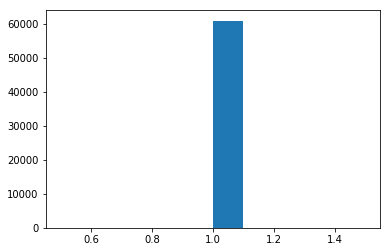

In [21]:
print(plt.hist(data.Product))

(array([56512.,     0.,     0.,  1355.,     0.,     0.,  1776.,     0.,
           0.,  1346.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <a list of 10 Patch objects>)


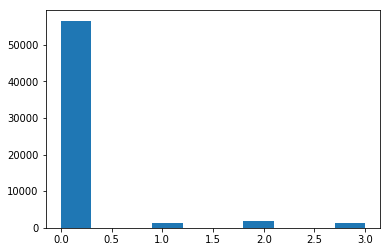

In [23]:
print(plt.hist(data.FedGuar))

(array([4.6750e+03, 3.1208e+04, 1.9445e+04, 4.9390e+03, 7.0700e+02,
       8.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00]), array([1.0000e-04, 9.7290e-02, 1.9448e-01, 2.9167e-01, 3.8886e-01,
       4.8605e-01, 5.8324e-01, 6.8043e-01, 7.7762e-01, 8.7481e-01,
       9.7200e-01]), <a list of 10 Patch objects>)


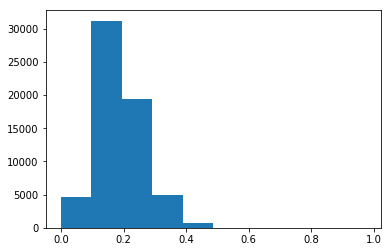

In [24]:
print(plt.hist(data.Front))

(array([6.8600e+02, 1.0355e+04, 2.0893e+04, 2.1533e+04, 7.2080e+03,
       2.8000e+02, 1.7000e+01, 8.0000e+00, 5.0000e+00, 4.0000e+00]), array([0.0042 , 0.10266, 0.20112, 0.29958, 0.39804, 0.4965 , 0.59496,
       0.69342, 0.79188, 0.89034, 0.9888 ]), <a list of 10 Patch objects>)


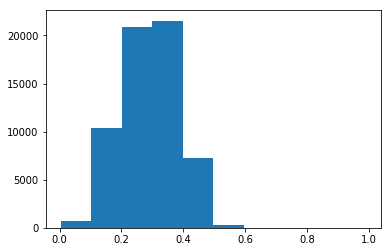

In [25]:
print(plt.hist(data.Back))

(array([3.6252e+04, 8.0510e+03, 5.5300e+02, 1.1611e+04, 4.1700e+02,
       1.1400e+02, 2.2650e+03, 9.3500e+02, 6.9000e+01, 1.5000e+01,
       1.0000e+00, 1.3200e+02, 5.0900e+02, 3.0000e+00, 1.2000e+01,
       1.4000e+01, 5.0000e+00, 0.0000e+00, 0.0000e+00, 2.8000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]), array([0.19450208, 0.3469223 , 0.49934252, 0.65176274, 0.80418295,
       0.95660317, 1.10902339, 1.26144361, 1.41386382, 1.56628404,
       1.71870426, 1.87112448, 2.02354469, 2.17596491, 2.32838513,
       2.48080535, 2.63322556, 2.78564578, 2.938066  , 3.09048622,
       3.24290643, 3.39532665, 3.54774687, 3.70016709, 3.8525873 ,
       4.00500752]), <a list of 25 Patch objects>)
(0.19, 0.347]     36252
(0.652, 0.804]    11611
(0.347, 0.499]     8051
(1.109, 1.261]     2265
(1.261, 1.414]      935
(0.499, 0.652]      553
(2.024, 2.176]      509
(0.804, 0.957]      417
(1.871, 2.024]      132
(0.957, 1.109]      114
(1.414, 1.566]       69
(3.09, 3.243

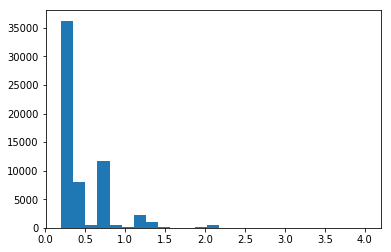

In [40]:
print(plt.hist(data.Loan_Multiplier, bins=25))
print(data["Loan_Multiplier"].value_counts(bins=25))